<a href="https://colab.research.google.com/github/VegemiteEnjoyer/Lecture_data_driven_science/blob/main/Lesson1_Answer_Regression_NaiveSparsemodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
clear()

In [ ]:
# matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Artificial data generation
# 人工データ生成

N = 21 # # of samples
a = 1
X = np.linspace(-10, 10, N)  # -10, 10 to N equally divided data.
                              # -10, 10までをN個等分割にデータを作る．

noise_cov = 3
noise = np.random.normal(0, noise_cov,[N])
y = a * X + noise

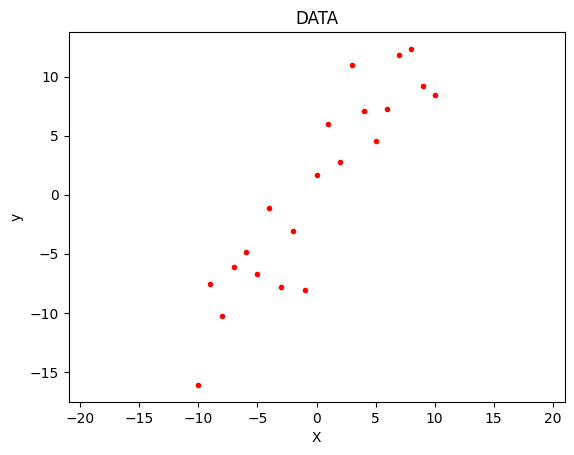

In [ ]:
# Q1: Plot the artificial data.
# 問１：人工データのプロットしてください。
plt.plot(X,y,'r.')
plt.axis('equal')
plt.title('DATA')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
## #### Analyzing Artificial Data ######
###### Loading libraries for analysis #####
# 人工データの解析　~解析に用いるライブラリーの読み込み~
from sklearn import linear_model # sklearn.linear_model.LinearRegression
from sklearn.model_selection import LeaveOneOut # cross validation
from sklearn.metrics import mean_squared_error # RMSE

In [ ]:
## Q2 : Generate a linear model with and without intercept, respectively.
# 問2 :　１次式のモデルのうち，切片があるモデルとないモデルをそれぞれ生成してください。
reg_ax_b = linear_model.LinearRegression(fit_intercept=True) ## (option to generate a model with an intercept)
                                                                              ## Hint: linear_model.LinearRegression, fit_intercept
reg_ax = linear_model.LinearRegression(fit_intercept=False)##( option to generate a model with no intercept)

In [ ]:
# Evaluate performance with K-partition cross validation
# K分割交差検証（cross validation）で性能を評価する

loo = LeaveOneOut() # Generating training and tes data set for leave one out cross validation
MSE_ax   = {"mean": [], "std": []}
MSE_ax_b = {"mean": [], "std": []}

scores_ax   = []
scores_ax_b = []

In [ ]:
# Leave one out cross validation data
for train_index, test_index in loo.split(X):
      #Test and Training data

      # Q3: Print train_index and test_index using print and check the test and training data.
      # 問3:　printをもちいて，train_index, test_indexをプリントし、テストデータとトレーニングデータを確認してください。
      print("%s %s" % (train_index, test_index))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20] [14]
[ 0  

In [ ]:
# main part: leave one out cross validation
for train_index, test_index in loo.split(X):
      #Test and Training data
      X_train = X[train_index]
      X_test  = X[test_index]
      y_train, y_test = y[train_index], y[test_index]

       ## Q4: Please train a model for linear regression using trainig data.
       ##問４:　線形回帰のモデルをトレーニグデータを用いて学習してください。
      # fit by Linear regression
      reg_ax_b.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])
      reg_ax  .fit(X_train[:, np.newaxis], y_train[:, np.newaxis])

      ## Q5: Using a linear regression model, make predictions about the test data.
      ## 問５:　線形回帰のモデルを用いて、テストデータについて予測してください。
      # predict
      pred_ax_b = reg_ax_b.predict(X_test[:, np.newaxis])
      pred_ax   = reg_ax.predict(X_test[:, np.newaxis])

      scores_ax_b.append(mean_squared_error(y_test, pred_ax_b))
      scores_ax.append((mean_squared_error(y_test, pred_ax)))

MSE_ax_b["mean"].append(np.mean(scores_ax_b))  # convert to positive
MSE_ax  ["mean"].append(np.mean(scores_ax))

print('Cross-validation error when y= ax+b as model: %.4f' % MSE_ax_b["mean"][0])
print('Cross-validation error when y= ax as model: %.4f' % MSE_ax["mean"][0])
#print('y= ax+bをモデルとしたときの交差検証誤差： %.4f' % MSE_ax_b["mean"][0])
#print('y= axをモデルとしたときの交差検証誤差： %.4f' % MSE_ax["mean"][0])

Cross-validation error when y= ax+b as model: 13.4962
Cross-validation error when y= ax as model: 12.3866
